# **CA04 - Ensemble Models**

# **1. Data Source and Contents**

The dataset is obtained from the Census Bureau and represents salaries of people along with seven demographic variables. The following is a description of our dataset:

• **Number of target classes:** 2 ('>50K' and '<=50K') [ Labels: 1, 0 ]

• **Number of attributes (Columns):** 7

• **Number of instances (Rows):** 48,842

In [366]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as pltpy
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

In [367]:
#reading in dataset
census_df = pd.read_csv('/content/census_data.csv')

## Data Quality Analysis

In [368]:
#number of null values in each column
census_df.isnull().sum()

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [369]:
#number of non-null values for each column
census_df.count()

hours_per_week_bin    48842
occupation_bin        48842
msr_bin               48842
capital_gl_bin        48842
race_sex_bin          48842
education_num_bin     48842
education_bin         48842
workclass_bin         48842
age_bin               48842
flag                  48842
y                     48842
dtype: int64

In [370]:
#statistical description of data
census_df.describe()

,y
count,48842.000000
mean,0.239282
std,0.426649
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [371]:
#displaying range, column, number of non-null objects of each column, datatype, and memory usage
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [372]:
#displaying top 5 and bottom 5 records
census_df.head()
census_df.tail()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0
48841,e. 51-60,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,c. 31-35 & 61-70,test,1


## Exploratory Data Analysis

EDA of the income group with respect to the seven explanatory variables and display graphical representations.

There are 7 explanatory variables:
1. Age (5 bins)
2. Capital Gain / Loss (3 bins)
3. Education (5 bins)
4. Hours per Week (5 bins)
5. Marriage Status and Relationship (3 bins)
6. Occupation (5 bins)
7. Race and Sex (3 bins)

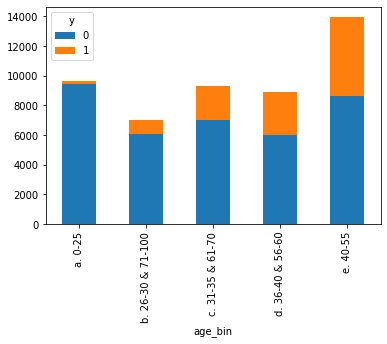

In [373]:
#Age Graphical Representation
census_df.pivot_table(index= 'age_bin', columns= 'y', aggfunc= 'size').plot.bar(stacked= True)

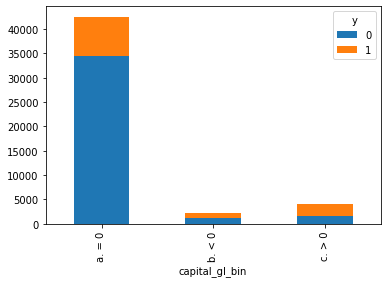

In [374]:
#Capital Gain / Loss Graphical Representation
census_df.pivot_table(index= 'capital_gl_bin', columns= 'y', aggfunc= 'size').plot.bar(stacked= True)

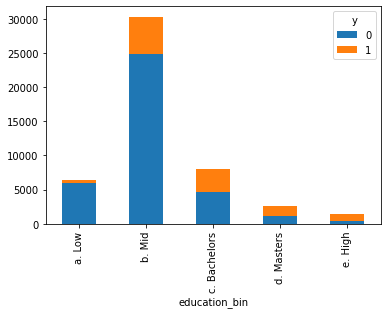

In [375]:
#Education Graphical Representation
census_df.pivot_table(index= 'education_bin', columns= 'y', aggfunc= 'size').plot.bar(stacked= True)

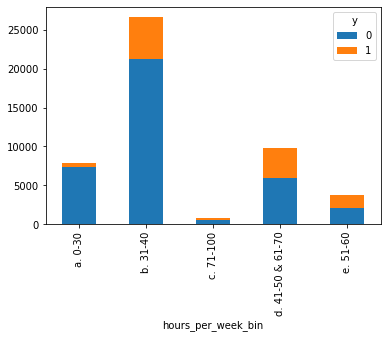

In [376]:
#Hours per Week Graphical Representation
census_df.pivot_table(index= 'hours_per_week_bin', columns= 'y', aggfunc= 'size').plot.bar(stacked= True)

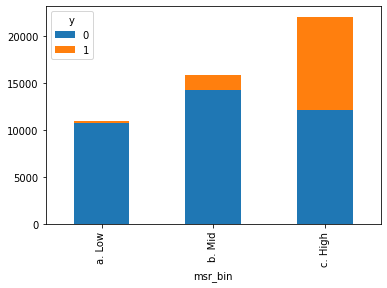

In [377]:
#Marriage Status and Relationship Graphical Representation
census_df.pivot_table(index= 'msr_bin', columns= 'y', aggfunc= 'size').plot.bar(stacked= True)

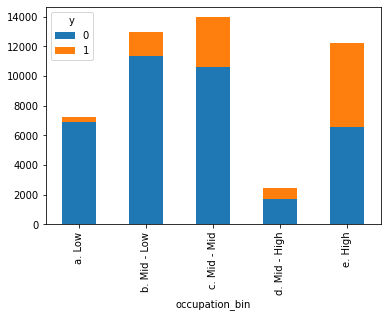

In [378]:
#Occupation Graphical Representation
census_df.pivot_table(index= 'occupation_bin', columns= 'y', aggfunc= 'size').plot.bar(stacked= True)

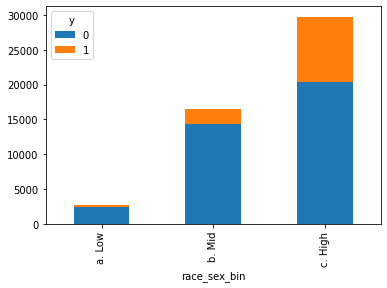

In [379]:
#Race and Sex Graphical Representation
census_df.pivot_table(index= 'race_sex_bin', columns= 'y', aggfunc= 'size').plot.bar(stacked= True)

## Splitting the Data

In [380]:
#changing feature columns into a categorical variable
for col in ['hours_per_week_bin','occupation_bin','msr_bin', 'capital_gl_bin',
'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
'age_bin']:
    census_df[col] = census_df[col].astype('category')

In [381]:
census_df[['hours_per_week_bin','occupation_bin','msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin']] = census_df[['hours_per_week_bin','occupation_bin','msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin']].apply(LabelEncoder().fit_transform)

In [382]:
#splitting original dataset into training and testing data on flag column
train_df = census_df.loc[census_df.flag == 'train']
test_df = census_df.loc[census_df.flag == 'test']

In [383]:
#dropping flag column as the data is already seperated
train_df.drop(columns= 'flag', inplace= True)
test_df.drop(columns= 'flag', inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [384]:
#split training and testing data into attributes/features (x) and labels (y)
y_train = train_df['y']
x_train = train_df.drop('y', axis= 1)

y_test = test_df['y']
x_test = test_df.drop('y', axis= 1)

# **2. Finding Optimal Value of a key Hyper-parameter**

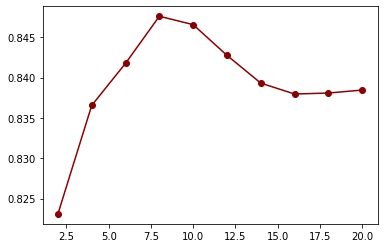

In [385]:
#Random Forest
#finding the optimal value for maximum depth
results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
    model = RandomForestClassifier(max_depth = trees, random_state = 101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    results.append(accuracy)

pltpy.plot(figsize= (8,4))
pd.Series(results, max_depth_options).plot(color = "darkred", marker = "o")

# **3. Building a Random Forest Model**

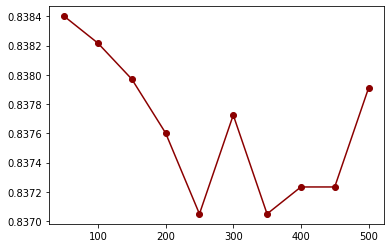

In [386]:
#Random Forest
#finding the optimal value for n_estimator
results = []
n_estimator_options = [50,100,150,200,250,300,350,400,450,500]
for n in n_estimator_options:
    model = RandomForestClassifier(n_estimators = n, random_state = 101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    results.append(accuracy)

pltpy.plot(figsize= (8,4))
pd.Series(results, n_estimator_options).plot(color = "darkred", marker = "o")

**1. Write your observations about the Classifier’s behavior with respect to the number of estimators.**

In this classifier, it appears that it achieves higher accuracy with a lower number of estimators.

**2. Is there an optimal value of the estimator within the given range?**

The optimal value for the range of estimators given was 50.

# **4. Building AdaBoost, Gradient Boost (classifier), and XGB Model**

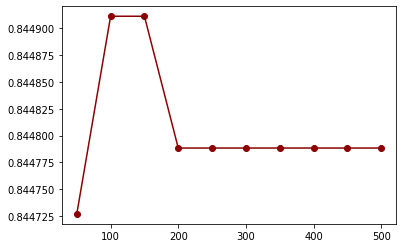

In [387]:
#AdaBoost
#finding the optimal value for n_estimator
results = []
n_estimator_options = [50,100,150,200,250,300,350,400,450,500]
for n in n_estimator_options:
    model = AdaBoostClassifier(n_estimators = n, random_state = 101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    results.append(accuracy)

pltpy.plot(figsize= (8,4))
pd.Series(results, n_estimator_options).plot(color = "darkred", marker = "o")

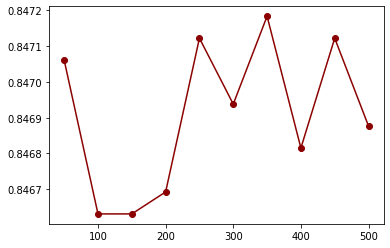

In [388]:
#Gradient Boost
#finding the optimal value for n_estimator
results = []
n_estimator_options = [50,100,150,200,250,300,350,400,450,500]
for n in n_estimator_options:
    model = GradientBoostingClassifier(n_estimators = n, random_state = 101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    results.append(accuracy)

pltpy.plot(figsize= (8,4))
pd.Series(results, n_estimator_options).plot(color = "darkred", marker = "o")

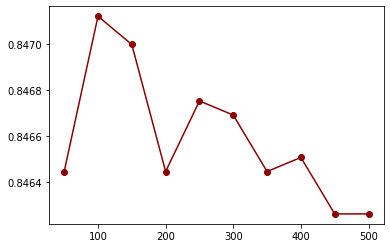

In [389]:
#XGB
#finding the optimal value for n_estimator
results = []
n_estimator_options = [50,100,150,200,250,300,350,400,450,500]
for n in n_estimator_options:
    model = XGBClassifier(n_estimators = n, random_state = 101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    results.append(accuracy)

pltpy.plot(figsize= (8,4))
pd.Series(results, n_estimator_options).plot(color = "darkred", marker = "o")

# **5. Compare Performance**

In [390]:
#creating an empty list
results = []

#classifiers used
classifiers = [RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,XGBClassifier]

#setting common hyperparameters
params = {'n_estimators': 100, 'random_state': 101}

#calculating accuracy and AUC of each model
for classifier in classifiers:
    model = classifier(**params)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    Accuracy = np.mean(y_test == y_pred)
    AUC = roc_auc_score(y_test,y_pred)

    results.append([Accuracy, AUC])

#putting results in comparison table
comparison = pd.DataFrame(results).transpose()
comparison.columns = ['Random Forest', 'AdaBoost', 'Gradient Boost', 'XGB']
comparison.index = ['Accuracy', 'AUC']
comparison

,Random Forest,AdaBoost,Gradient Boost,XGB
Accuracy,0.838216,0.844911,0.846631,0.847122
AUC,0.747542,0.746088,0.756732,0.756785


In [391]:
print(params)

{'n_estimators': 100, 'random_state': 101}
